In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1. / 255,validation_split=0.2)
img_height = 224
img_width = 224 
batch_size = 128
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset3/dataset',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset3/dataset',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 1523 images belonging to 38 classes.
Found 380 images belonging to 38 classes.


In [ ]:
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 224, 224, 3), min=5.000, max=251.000


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_it, test_size=0.2, random_state=42)

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications import inception_v3
# Init the VGG model
vgg_conv = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

87916544/87910968 [==============================] - 4s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb1136fa5d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb0d19e7190> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb0d19ceb90> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb0d1a1ae10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb0d16c37d0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb0d16cde90> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb0e0e19690> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb0d16d77d0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb0d1660d10> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb0d19e79d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb0d166ed90> False
<tensorflow.python.keras.layers.c

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              52429824  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 38)                38950     
Total params: 74,271,558
Trainable params: 52,468,774
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
train_it.samples

10656

In [ ]:
import keras
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.16,
    staircase=True)
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy',
#              optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
#              metrics=['acc'])
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-4),
              metrics=['acc'])

In [ ]:
nb_epochs = 70
batch_size = 128
model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
11/11 [==============================] - 817s 78s/step - loss: 5.1345 - acc: 0.0241 - val_loss: 3.9084 - val_acc: 0.0391
Epoch 2/70
11/11 [==============================] - 11s 988ms/step - loss: 4.4592 - acc: 0.0538 - val_loss: 3.4336 - val_acc: 0.1133
Epoch 3/70
11/11 [==============================] - 11s 1s/step - loss: 3.9500 - acc: 0.0685 - val_loss: 3.0129 - val_acc: 0.1836
Epoch 4/70
11/11 [==============================] - 11s 1s/step - loss: 3.5626 - acc: 0.1114 - val_loss: 2.6495 - val_acc: 0.3477
Epoch 5/70
11/11 [==============================] - 11s 987ms/step - loss: 3.2589 - acc: 0.1548 - val_loss: 2.4102 - val_acc: 0.4766
Epoch 6/70
11/11 [==============================] - 12s 1s/step - loss: 2.8478 - acc: 0.2400 - val_loss: 2.1640 - val_acc: 0.5859
Epoch 7/70
11/11 [==============================] - 11s 1s/step - loss: 2.5926 - acc: 0.2857 - val_loss: 1.9427 - val_acc: 0.6641
Epoch 8/70
11/11 [==============================] - 11s 1s/step - loss: 2.3283 - a

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_3_inception")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_3_inception/assets


In [ ]:
val_it.classes

array([ 0,  0,  0, ..., 36, 36, 36], dtype=int32)

In [ ]:
batch_size = 380
# prepare an iterators for each dataset
#train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset3/dataset',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset3/dataset',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 380 images belonging to 38 classes.


In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 99.74%
[INFO] Loss:  0.08739648014307022


In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

In [ ]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(model.history['loss'],'r',linewidth=3.0)

plt.plot(model.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

AttributeError: ignored

<Figure size 576x432 with 0 Axes>

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.9973684210526316


In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['15cha', '16.chha', '2.ah', '31.b', '38.bsro', '38.chndro', '6.ae', 'da', 'dda', 'ddha', 'dha', 'eio', 'fa', 'ga', 'gha', 'ha', 'i', 'ja', 'jha', 'k', 'kha', 'la', 'ma', 'na', 'o', 'oha', 'oi', 'onsor', 'ou', 'pa', 'rri', 'sa', 'ta', 'tha', 'tta', 'ttha', 'u', 'umo']


Normalized confusion matrix


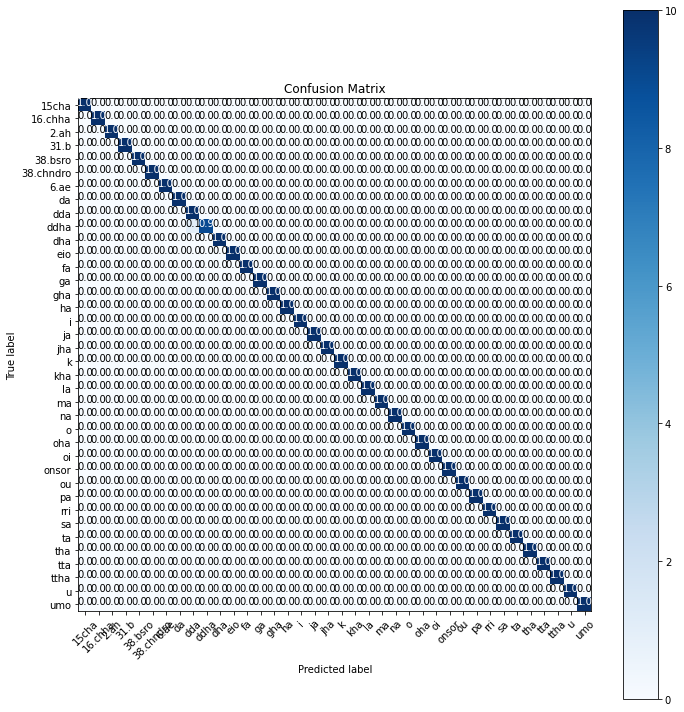

In [ ]:
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       15cha       1.00      1.00      1.00        10
     16.chha       1.00      1.00      1.00        10
        2.ah       1.00      1.00      1.00        10
        31.b       1.00      1.00      1.00        10
     38.bsro       1.00      1.00      1.00        10
   38.chndro       1.00      1.00      1.00        10
        6.ae       1.00      1.00      1.00        10
          da       1.00      1.00      1.00        10
         dda       0.91      1.00      0.95        10
        ddha       1.00      0.90      0.95        10
         dha       1.00      1.00      1.00        10
         eio       1.00      1.00      1.00        10
          fa       1.00      1.00      1.00        10
          ga       1.00      1.00      1.00        10
         gha       1.00      1.00      1.00        10
          ha       1.00      1.00      1.00        10
           i       1.00      1.00      1.00        10
     